## 导入

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, joblib
from sklearn.calibration import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

modelPath = 'model'

def saveModel(df, name):
    joblib.dump(df, os.path.join(modelPath, name))

def loadModel(name):
    return joblib.load(os.path.join(modelPath, name))


In [31]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/testA.csv')
submit = pd.read_csv('data/sample_submit.csv')

## 数据浏览

In [32]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [33]:
test.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,...,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,...,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,...,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,...,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,...,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [34]:
train.shape, test.shape

((800000, 47), (200000, 46))

In [35]:
train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'loanAmnt'}>,
        <Axes: title={'center': 'term'}>,
        <Axes: title={'center': 'interestRate'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'employmentTitle'}>],
       [<Axes: title={'center': 'homeOwnership'}>,
        <Axes: title={'center': 'annualIncome'}>,
        <Axes: title={'center': 'verificationStatus'}>,
        <Axes: title={'center': 'isDefault'}>,
        <Axes: title={'center': 'purpose'}>,
        <Axes: title={'center': 'postCode'}>],
       [<Axes: title={'center': 'regionCode'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinquency_2years'}>,
        <Axes: title={'center': 'ficoRangeLow'}>,
        <Axes: title={'center': 'ficoRangeHigh'}>,
        <Axes: title={'center': 'openAcc'}>],
       [<Axes: title={'center': 'pubRec'}>,
        <Axes: title={'center': 'pubRecBankruptcies'}>,
        <Axes: title={'center':

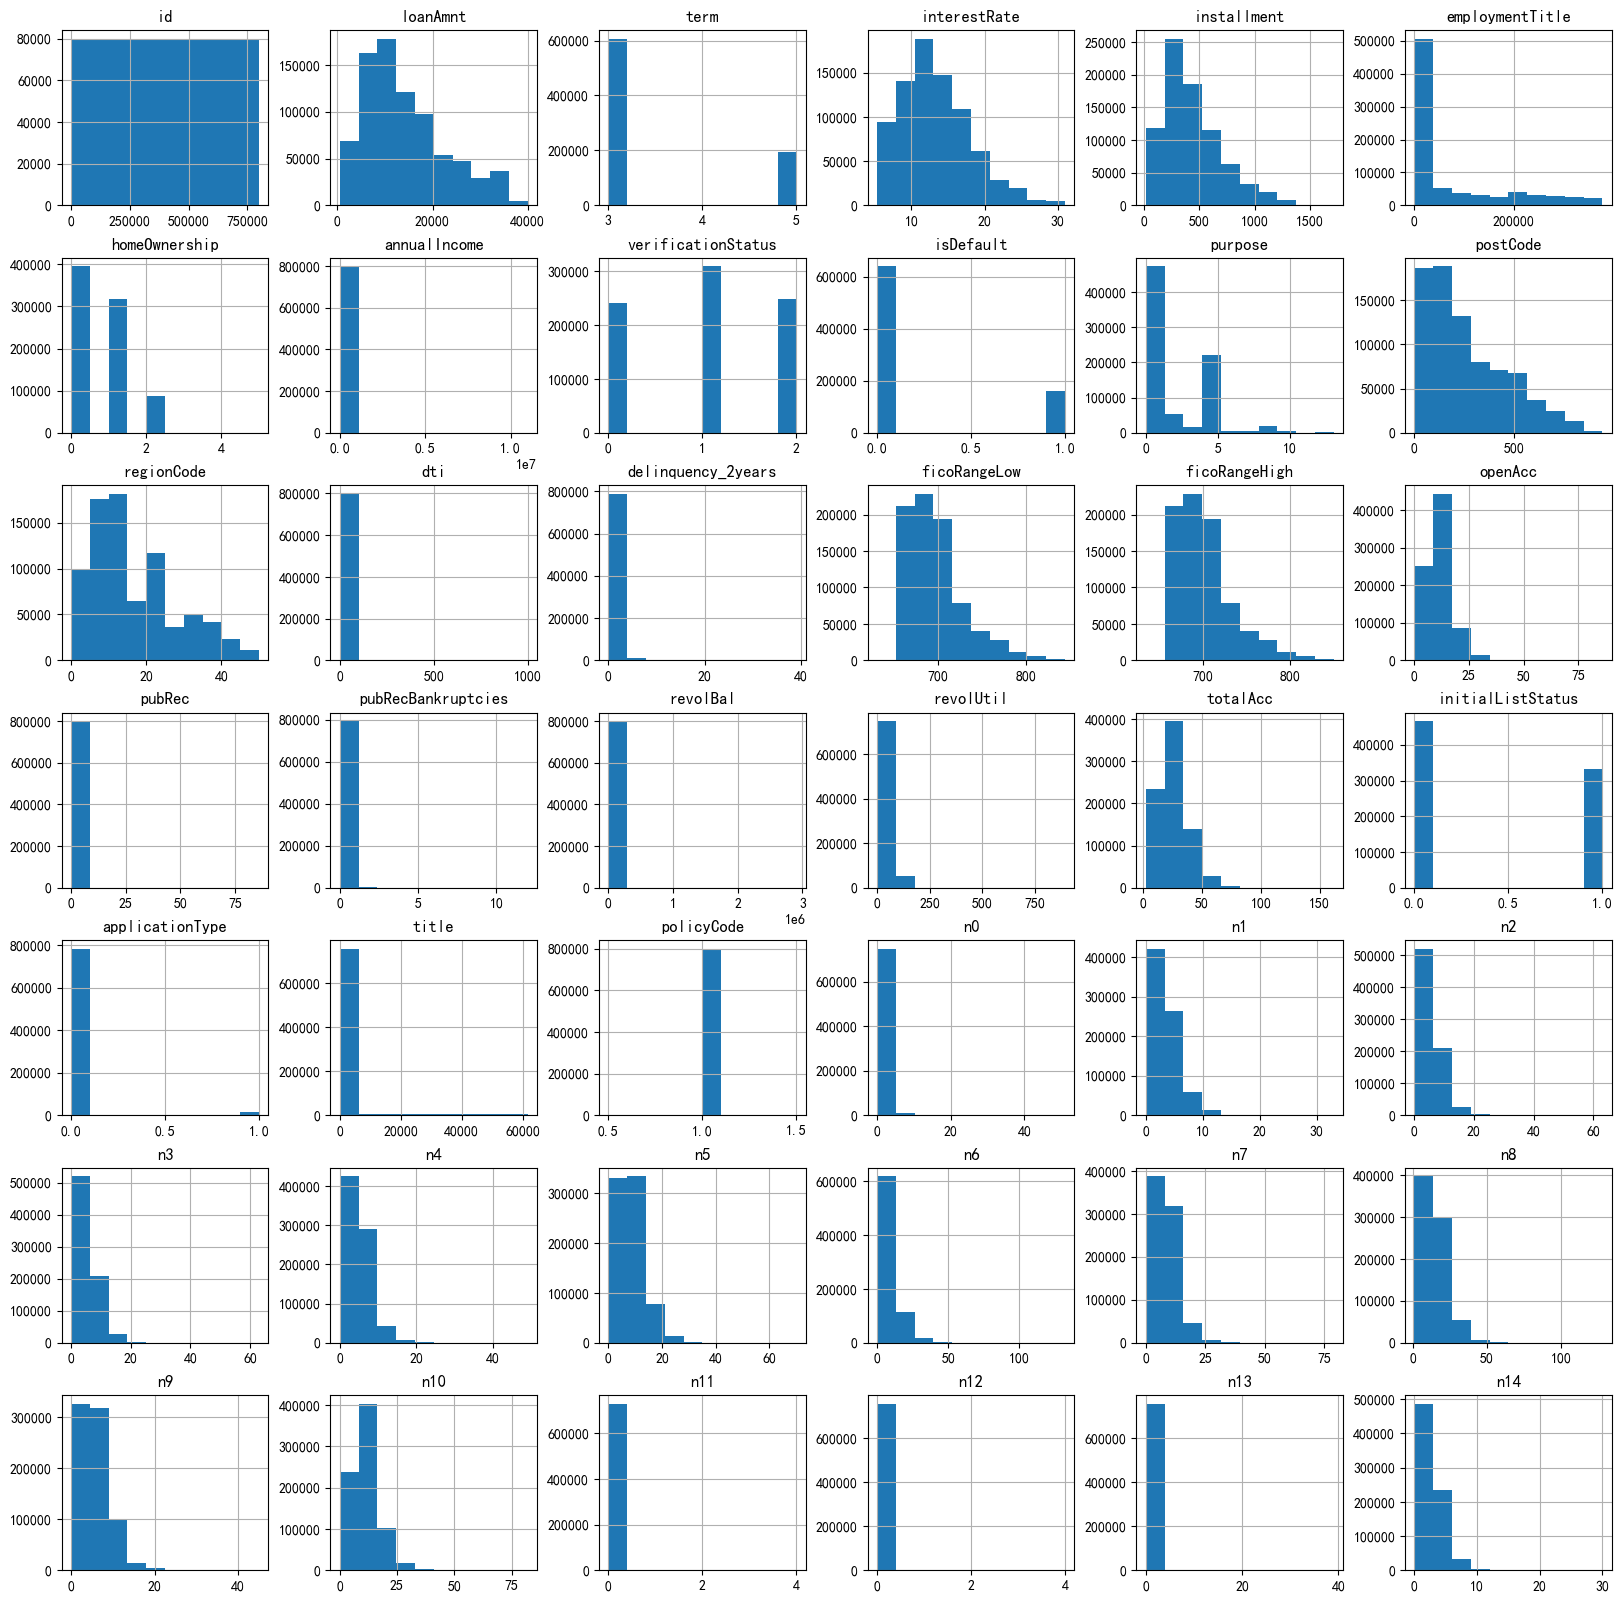

In [36]:
train.hist(figsize=(20,20))

In [37]:
train = train.drop(columns='id')
test = test.drop(columns='id')

查看特征取值种类数

In [38]:
def printUnique(df, col):
    for i in col:
        n = df[i].nunique()
        print(f'{i} 有 {n} 种取值')
        if n < 10:
            print(f'  -- {i} 的取值为: {df[i].unique()}')
        else:
            print(f'  -- {i} 的取值为: {df[i].unique()[:10]}...')
            
printUnique(train, train.columns)

loanAmnt 有 1540 种取值
  -- loanAmnt 的取值为: [35000. 18000. 12000. 11000.  3000.  2050. 11500.  6500.  5600.  5000.]...
term 有 2 种取值
  -- term 的取值为: [5 3]
interestRate 有 641 种取值
  -- interestRate 的取值为: [19.52 18.49 16.99  7.26 12.99  7.99  7.69 14.98 10.99 13.67]...
installment 有 72360 种取值
  -- installment 的取值为: [917.97 461.9  298.17 340.96 101.07 344.65  63.95 398.54 404.27 212.78]...
grade 有 7 种取值
  -- grade 的取值为: ['E' 'D' 'A' 'C' 'B' 'F' 'G']
subGrade 有 35 种取值
  -- subGrade 的取值为: ['E2' 'D2' 'D3' 'A4' 'C2' 'A5' 'C3' 'B4' 'B5' 'E5']...
employmentTitle 有 248683 种取值
  -- employmentTitle 的取值为: [3.20000e+02 2.19843e+05 3.16980e+04 4.68540e+04 5.40000e+01 5.17270e+04
 1.80083e+05 2.14017e+05 1.88000e+02 4.66310e+04]...
employmentLength 有 11 种取值
  -- employmentLength 的取值为: ['2 years' '5 years' '8 years' '10+ years' nan '7 years' '9 years'
 '1 year' '3 years' '< 1 year']...
homeOwnership 有 6 种取值
  -- homeOwnership 的取值为: [2 0 1 5 3 4]
annualIncome 有 44926 种取值
  -- annualIncome 的取值为: [110000.  4600

数值型

非数值型(字符串)

C:\Users\chen\AppData\Local\Temp\ipykernel_15652\3341414862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=unique_counts.values, y=unique_counts.index, palette='viridis')


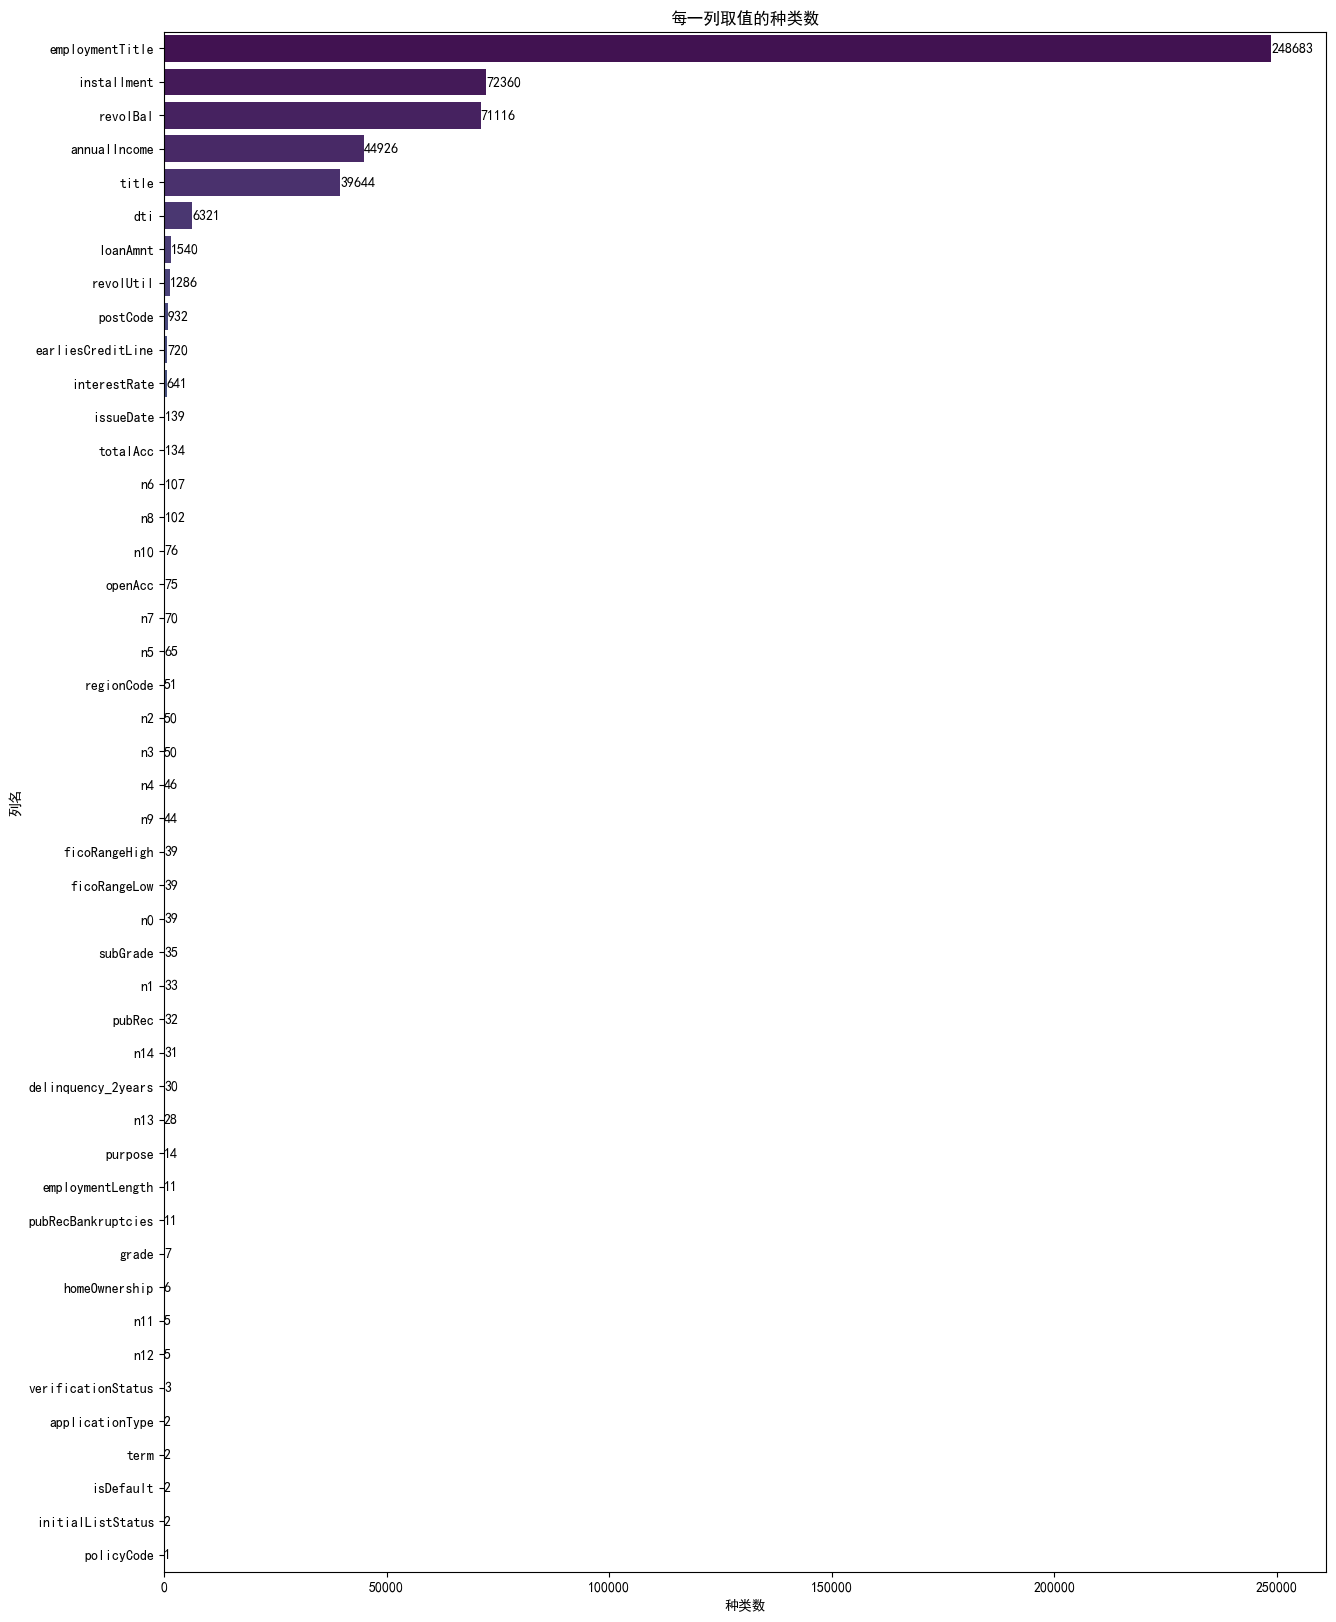

C:\Users\chen\AppData\Local\Temp\ipykernel_15652\3341414862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=unique_counts.values, y=unique_counts.index, palette='viridis')


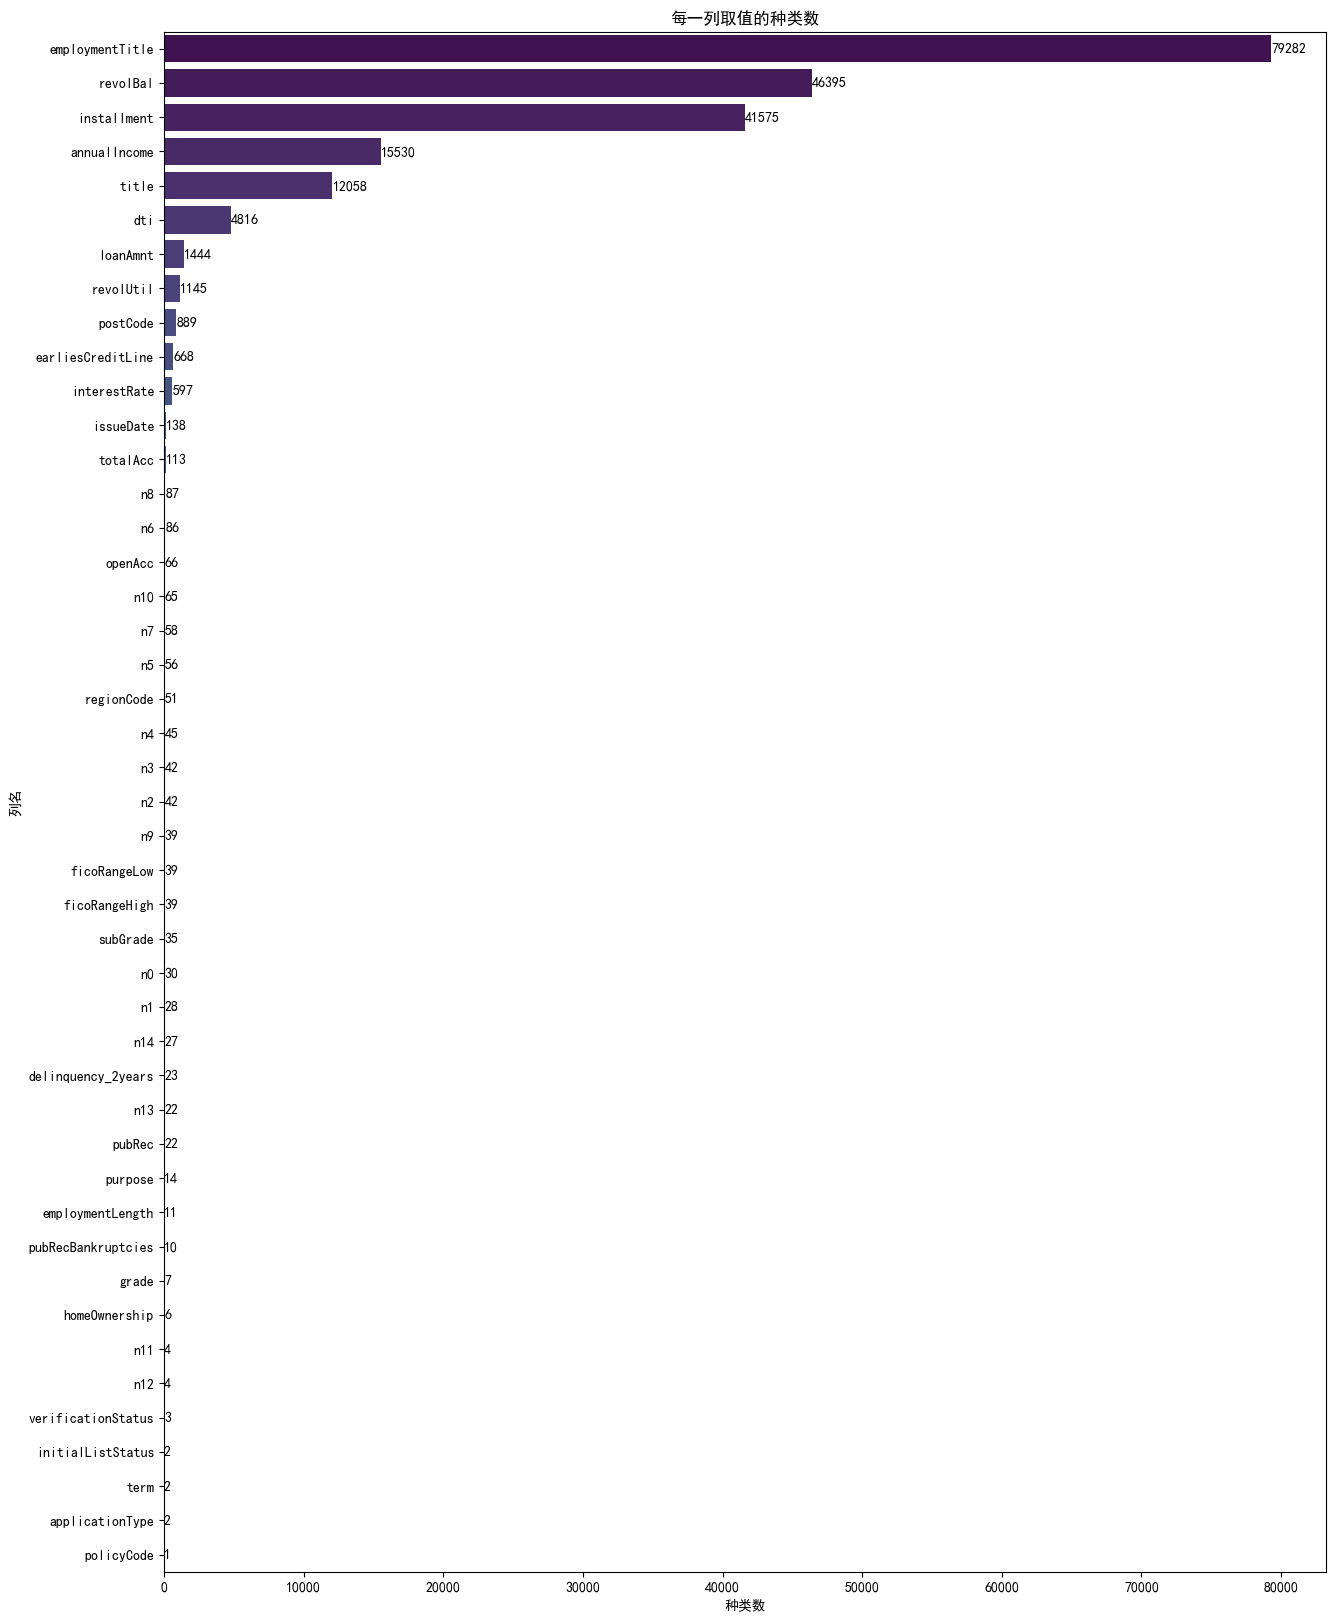

In [39]:
def plotUniqueValues(df):
    unique_counts = df.nunique()
    unique_counts = unique_counts.sort_values(ascending=False)
    
    plt.figure(figsize=(15, 20))
    ax = sns.barplot(x=unique_counts.values, y=unique_counts.index, palette='viridis')
    plt.xlabel('种类数')
    plt.ylabel('列名')
    plt.title('每一列取值的种类数')
    

    for i, v in enumerate(unique_counts.values):
        ax.text(v + 0.1, i, str(v), color='black', va='center')

    plt.show()

plotUniqueValues(train)
plotUniqueValues(test)

查看缺失值

In [40]:
def printMiss(df):
    missing_count = df.isnull().sum()
    
    # 计算每列的缺失率
    missing_rate = missing_count / len(df) * 100
    
    # 创建一个 DataFrame 来存储结果
    missing_data = pd.DataFrame({
        '缺失值数量': missing_count,
        '缺失率 (%)': missing_rate
    })
    
    # 打印结果
    print(missing_data)

# 假设 df 是你的 DataFrame
# df = ...

printMiss(train)
print('-------------------------------------')
printMiss(test)

                    缺失值数量   缺失率 (%)
loanAmnt                0  0.000000
term                    0  0.000000
interestRate            0  0.000000
installment             0  0.000000
grade                   0  0.000000
subGrade                0  0.000000
employmentTitle         1  0.000125
employmentLength    46799  5.849875
homeOwnership           0  0.000000
annualIncome            0  0.000000
verificationStatus      0  0.000000
issueDate               0  0.000000
isDefault               0  0.000000
purpose                 0  0.000000
postCode                1  0.000125
regionCode              0  0.000000
dti                   239  0.029875
delinquency_2years      0  0.000000
ficoRangeLow            0  0.000000
ficoRangeHigh           0  0.000000
openAcc                 0  0.000000
pubRec                  0  0.000000
pubRecBankruptcies    405  0.050625
revolBal                0  0.000000
revolUtil             531  0.066375
totalAcc                0  0.000000
initialListStatus       0  0

有缺失值、偏态  
还有的特征重要程度低

需要进行预处理

## 预处理 - 缺失值填充

In [41]:
train = train.dropna().reset_index(drop=True)
train.shape

(686195, 46)

连续型 数值 特征 - 平均数  
数值型 离散 特征 - 众数  
非数值型(字符串) - 众数

In [42]:
aver_fill = ['loanAmnt', 'interestRate', 'installment', 'annualIncome', 'dti', 'ficoRangeLow', 'ficoRangeHigh', 'revolBal', 'revolUtil', 'n14' ] + [f'n{i}' for i in range(11)]
other_col = train.drop(columns=aver_fill + ['isDefault']).columns.tolist() # isDefault 排除，不参与后面的特征编码


def fill_null(df, col_aver):
    for column in col_aver:
        df[column].fillna(df[column].mean(), inplace=True)

    col_others = df.drop(columns=col_aver).columns
    
    for column in col_others:
        df[column].fillna(df[column].mode()[0], inplace=True)


fill_null(train, aver_fill)
fill_null(test, aver_fill)

In [43]:
train.isnull().any().sum(), test.isnull().any().sum()

(0, 0)

## 特征编码

字符串特征需要进行编码，其中

类别特征 - one hot encode  
日期 - 特殊考虑

issueDate 取月份  
earliesCreditLine 取年份

In [44]:
# 查看字符串值
def print_string_columns(df):
    for column in df.columns:
        if df[column].dtype == 'object': 
            print(f"列 {column} 的具体取值为: {df[column].unique()}")

print_string_columns(train)

列 grade 的具体取值为: ['E' 'D' 'A' 'C' 'B' 'F' 'G']
列 subGrade 的具体取值为: ['E2' 'D3' 'A4' 'A5' 'C3' 'B5' 'E5' 'D4' 'B3' 'B2' 'D1' 'B4' 'E1' 'C5'
 'C1' 'A2' 'C2' 'A3' 'B1' 'D2' 'E3' 'F1' 'C4' 'A1' 'D5' 'F2' 'E4' 'F3'
 'G2' 'F5' 'G3' 'G1' 'F4' 'G4' 'G5']
列 employmentLength 的具体取值为: ['2 years' '8 years' '10+ years' '7 years' '9 years' '1 year' '3 years'
 '< 1 year' '4 years' '5 years' '6 years']
列 issueDate 的具体取值为: ['2014-07-01' '2015-10-01' '2015-08-01' '2017-04-01' '2014-10-01'
 '2014-01-01' '2013-11-01' '2018-12-01' '2017-05-01' '2016-01-01'
 '2017-02-01' '2014-05-01' '2015-05-01' '2012-12-01' '2013-12-01'
 '2016-12-01' '2015-04-01' '2018-01-01' '2016-05-01' '2018-04-01'
 '2013-06-01' '2016-08-01' '2012-09-01' '2017-01-01' '2015-01-01'
 '2016-06-01' '2017-08-01' '2016-11-01' '2013-07-01' '2014-08-01'
 '2015-12-01' '2017-03-01' '2018-05-01' '2015-09-01' '2014-11-01'
 '2016-04-01' '2014-12-01' '2016-03-01' '2015-07-01' '2016-07-01'
 '2013-05-01' '2013-04-01' '2016-02-01' '2014-04-01' '2015-03-01'


In [45]:
def date_encode(df):
    df['issueDate'] = pd.to_datetime(df['issueDate']).dt.year
    df['earliesCreditLine'] = pd.to_datetime(df['earliesCreditLine'], format='%b-%Y').dt.year


date_encode(train)
date_encode(test)

In [46]:
train['issueDate'], train['earliesCreditLine']

(0         2014
 1         2015
 2         2015
 3         2017
 4         2014
           ... 
 686190    2016
 686191    2013
 686192    2015
 686193    2015
 686194    2018
 Name: issueDate, Length: 686195, dtype: int32,
 0         2001
 1         2006
 2         1999
 3         1998
 4         2006
           ... 
 686190    2011
 686191    1989
 686192    2002
 686193    1994
 686194    2002
 Name: earliesCreditLine, Length: 686195, dtype: int32)

In [47]:
encode_col = other_col.remove('issueDate')
encode_col = other_col.remove('earliesCreditLine')

printUnique(train, other_col)

term 有 2 种取值
  -- term 的取值为: [5 3]
grade 有 7 种取值
  -- grade 的取值为: ['E' 'D' 'A' 'C' 'B' 'F' 'G']
subGrade 有 35 种取值
  -- subGrade 的取值为: ['E2' 'D3' 'A4' 'A5' 'C3' 'B5' 'E5' 'D4' 'B3' 'B2']...
employmentTitle 有 217873 种取值
  -- employmentTitle 的取值为: [   320.  31698.  46854.  51727. 180083. 214017.  46631. 140759. 139297.
   4967.]...
employmentLength 有 11 种取值
  -- employmentLength 的取值为: ['2 years' '8 years' '10+ years' '7 years' '9 years' '1 year' '3 years'
 '< 1 year' '4 years' '5 years']...
homeOwnership 有 6 种取值
  -- homeOwnership 的取值为: [2 0 1 3 5 4]
verificationStatus 有 3 种取值
  -- verificationStatus 的取值为: [2 1 0]
purpose 有 14 种取值
  -- purpose 的取值为: [1 0 4 9 2 3 7 8 5 6]...
postCode 有 927 种取值
  -- postCode 的取值为: [137. 337. 148. 512. 517. 100. 134. 893. 195. 167.]...
regionCode 有 51 种取值
  -- regionCode 的取值为: [32 14 11 21  4  8 49 38 36 15]...
delinquency_2years 有 30 种取值
  -- delinquency_2years 的取值为: [ 0.  3.  2.  5.  1.  8.  4.  6. 11. 12.]...
openAcc 有 73 种取值
  -- openAcc 的取值为: [ 7. 11.  

['grade', 'subGrade', 'employmentLength'] 三种字符串型数据

subGrade A1~E5 35种组合，**顺序编码**

'grade', ['E' 'D' 'A' 'C' 'B' 'F' 'G'] **one hot encode**

'employmentLength' ['2 years' '5 years' '8 years' '10+ years' '7 years' '9 years' '1 year'] **one hot encode**



In [48]:
label_encoder = LabelEncoder()
train['subGrade'] = label_encoder.fit_transform(train['subGrade'])
test['subGrade'] = label_encoder.fit_transform(test['subGrade'])

In [49]:
train['subGrade']

0         21
1         17
2          3
3          4
4          3
          ..
686190    13
686191     3
686192    12
686193     3
686194     7
Name: subGrade, Length: 686195, dtype: int32

In [50]:
train = pd.get_dummies(train, columns=['grade', 'employmentLength'], prefix=['grade', 'employmentLength'])
test = pd.get_dummies(test, columns=['grade', 'employmentLength'], prefix=['grade', 'employmentLength'])

剩下一些数值型离散特征，根据特征取值的数目决定是否one hot编码

*此处注意我把train test合并在一起，进行onehot编码*

In [51]:
columns_to_encode = [
    'term', 'homeOwnership', 'verificationStatus', 'purpose', 'regionCode',
    'initialListStatus', 'applicationType', 'n11', 'n12', 'n13'
]

# 取出isDefault
y_train = train['isDefault']
train = train.drop(columns='isDefault')

# concat
tmp = pd.concat([train, test], axis=0)

# encode
tmp = pd.get_dummies(tmp, columns=columns_to_encode, prefix=columns_to_encode)

# 拆分
train = tmp.iloc[:len(train)]
test = tmp.iloc[len(train):]

正态化

In [52]:
from scipy.stats import skew, skewtest, boxcox

train[aver_fill] = train[aver_fill] + 1 - train[aver_fill].min()
for column in aver_fill:
    # 检查偏态
    skewness = skew(train[column])
    skew_test = skewtest(train[column])
    print(f"Column: {column}, Skewness: {skewness}, p-value: {skew_test.pvalue}")

    # 如果偏态显著（p-value < 0.05），进行正态化处理
    if skew_test.pvalue < 0.05:
        # 对数变换（适用于所有值为正的列）
        if (train[column] > 0).all():
            train[column] = np.log1p(train[column])
            print(f"Column: {column} has been log-transformed.")
        else:
            # Box-Cox 变换（适用于所有值为正的列）
            train[column], _ = boxcox(train[column] + 1)  # 加1以确保所有值为正
            print(f"Column: {column} has been Box-Cox transformed.")

C:\Users\chen\AppData\Local\Temp\ipykernel_15652\3720792871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[aver_fill] = train[aver_fill] + 1 - train[aver_fill].min()
C:\Users\chen\AppData\Local\Temp\ipykernel_15652\3720792871.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column] = np.log1p(train[column])


Column: loanAmnt, Skewness: 0.7531868740699389, p-value: 0.0
Column: loanAmnt has been log-transformed.
Column: interestRate, Skewness: 0.7215280545326224, p-value: 0.0
Column: interestRate has been log-transformed.
Column: installment, Skewness: 0.983696697854457, p-value: 0.0
Column: installment has been log-transformed.
Column: annualIncome, Skewness: 48.41060558278698, p-value: 0.0
Column: annualIncome has been log-transformed.
Column: dti, Skewness: 12.810202992140809, p-value: 0.0
Column: dti has been log-transformed.
Column: ficoRangeLow, Skewness: 1.2964722474006984, p-value: 0.0
Column: ficoRangeLow has been log-transformed.
Column: ficoRangeHigh, Skewness: 1.2966748143342497, p-value: 0.0
Column: ficoRangeHigh has been log-transformed.
Column: revolBal, Skewness: 17.65341925392368, p-value: 0.0
Column: revolBal has been log-transformed.
Column: revolUtil, Skewness: 0.0007436410981468247, p-value: 0.8014373076961637
Column: n14, Skewness: 1.4921788563493346, p-value: 0.0
Colum

array([[<Axes: title={'center': 'loanAmnt'}>,
        <Axes: title={'center': 'interestRate'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'annualIncome'}>,
        <Axes: title={'center': 'dti'}>],
       [<Axes: title={'center': 'ficoRangeLow'}>,
        <Axes: title={'center': 'ficoRangeHigh'}>,
        <Axes: title={'center': 'revolBal'}>,
        <Axes: title={'center': 'revolUtil'}>,
        <Axes: title={'center': 'n14'}>],
       [<Axes: title={'center': 'n0'}>, <Axes: title={'center': 'n1'}>,
        <Axes: title={'center': 'n2'}>, <Axes: title={'center': 'n3'}>,
        <Axes: title={'center': 'n4'}>],
       [<Axes: title={'center': 'n5'}>, <Axes: title={'center': 'n6'}>,
        <Axes: title={'center': 'n7'}>, <Axes: title={'center': 'n8'}>,
        <Axes: title={'center': 'n9'}>],
       [<Axes: title={'center': 'n10'}>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

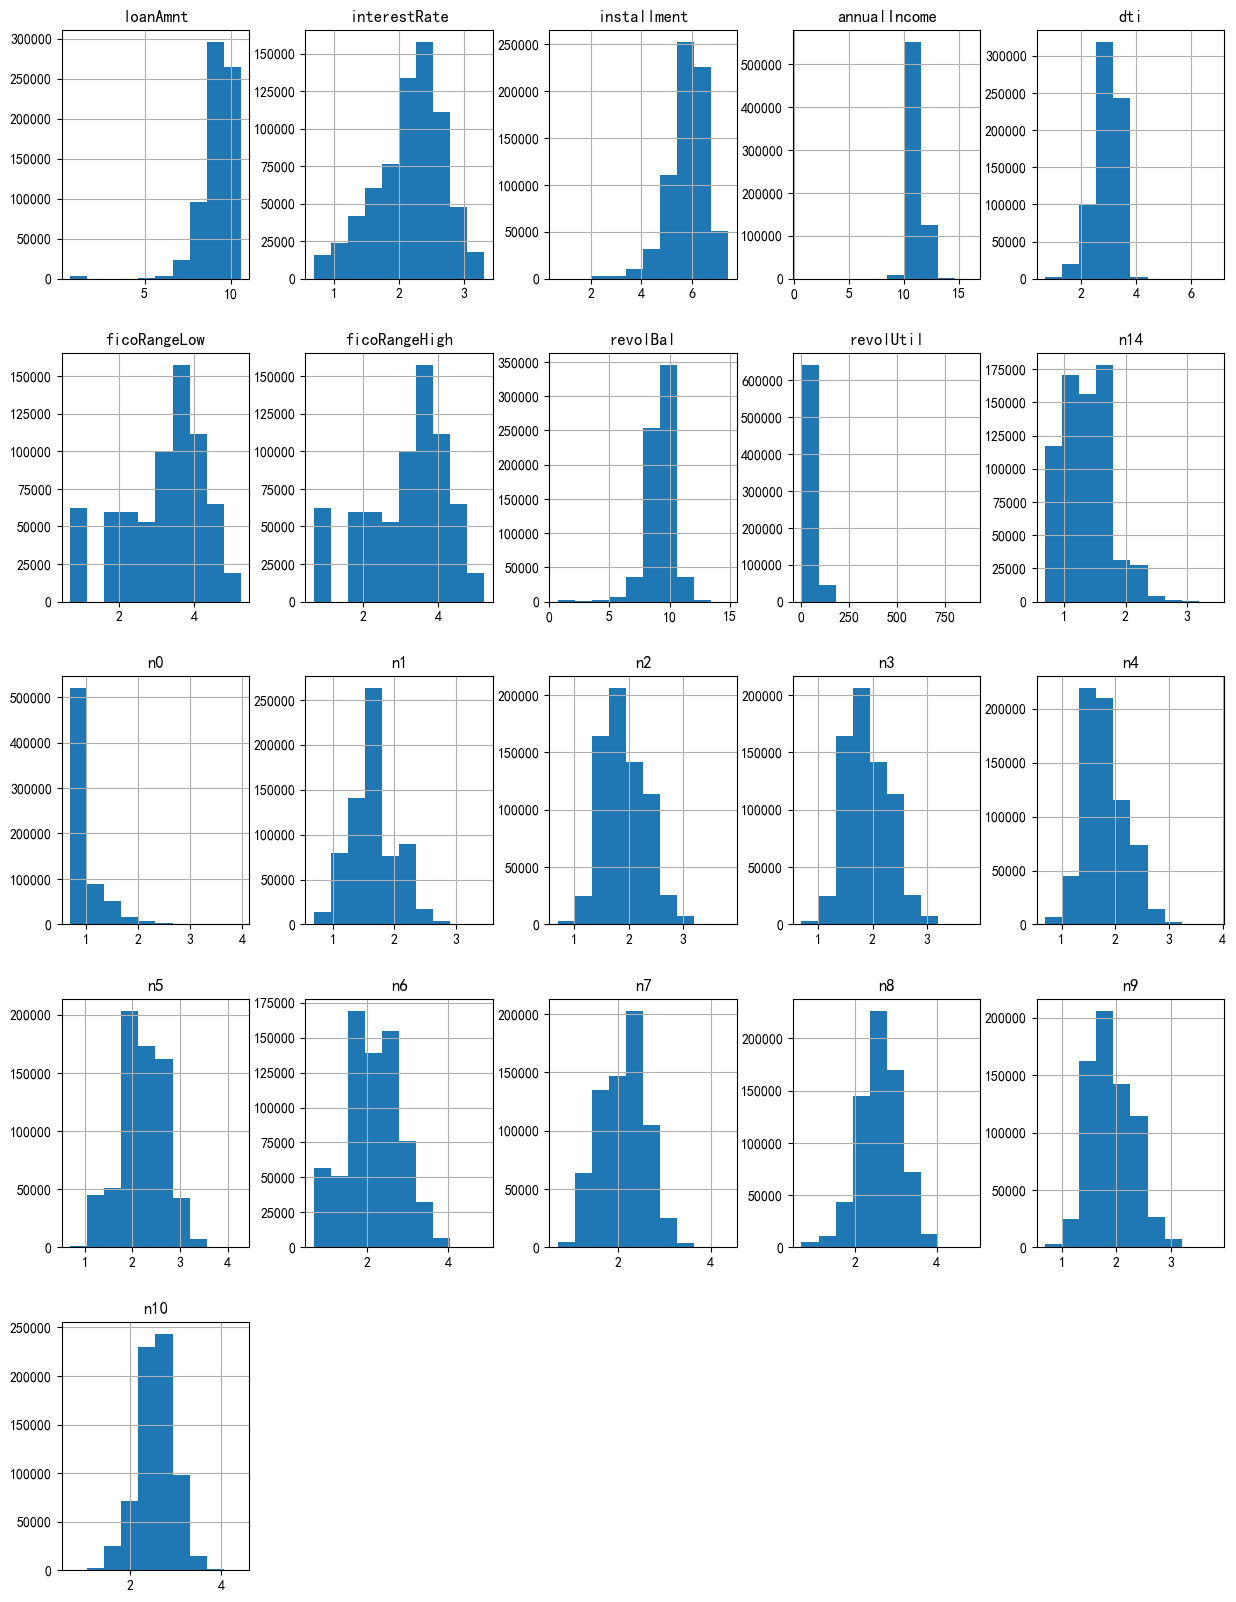

In [53]:
train[aver_fill].hist(figsize=(15, 20))

删除异常值

In [54]:
def remove_outliers(df, column):
    # 计算四分位数
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # 定义上下限
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 过滤掉异常值
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


for column in aver_fill:
    train = remove_outliers(train, column)

输出

In [55]:
train.shape, test.shape

((423765, 170), (200000, 170))

In [56]:
X_train = train
X_need_pred = test
y_train = y_train[X_train.index]

In [57]:
X_train.shape, X_need_pred.shape, y_train.shape

((423765, 170), (200000, 170), (423765,))

In [58]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [59]:
from sklearn.model_selection import train_test_split

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set shape:", X_train_split.shape)
print("Testing set shape:", X_test_split.shape)

Training set shape: (339012, 170)
Testing set shape: (84753, 170)


## 模型训练

### 逻辑回归

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score


# 创建一个包含标准化和逻辑回归的管道
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=500, n_jobs=-1))

# 定义超参数网格
param = {
    'logisticregression__solver': ['saga'], # 坐标轴下降、牛顿法、随机平均梯度下降
    'logisticregression__penalty': ['l1', 'l2'],  # L2 正则化和弹性网络正则化
    'logisticregression__max_iter': [200],
    'logisticregression__C':[0.5, 0.8]
}

# 使用 AUC 作为评分指标
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# 使用分层抽样的交叉验证方法
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True)

# 使用网格搜索调整超参数
grid = GridSearchCV(pipeline, param_grid=param, cv=stratified_kfold, scoring=auc_scorer, verbose=1, n_jobs=-1)
# 训练模型
grid.fit(X_train, y_train)

d:\tool\Anconda\envs\ML\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=500,
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.5, 0.8],
                         'logisticregression__max_iter': [200],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['saga']},
             scoring=make_scorer(roc_auc_score, response_method='predict_proba'),
             verbose=1)

In [33]:
grid.best_params_

{'logisticregression__C': 0.8,
 'logisticregression__max_iter': 200,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga'}

In [34]:
log_clf = grid.best_estimator_

saveModel(log_clf, 'log_clf.pkl')

In [35]:
# 输出分类报告
from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(y_train, log_clf.predict(X_train)))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89    341108
           1       0.57      0.07      0.12     82657

    accuracy                           0.81    423765
   macro avg       0.69      0.53      0.51    423765
weighted avg       0.77      0.81      0.74    423765



In [36]:
roc_auc = roc_auc_score(y_train, log_clf.predict(X_train))
print("AUC: {:.2f}".format(roc_auc))

AUC: 0.53


### XGBoost

In [109]:
import numpy as np
import xgboost as xgb

# 假设 X_train 和 y_train 已经定义
X_train = X_train.astype('float32')

# 确保特征名称为字符串
X_train.columns = X_train.columns.astype(str)

# 移除不允许的字符
X_train.columns = X_train.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')

# 创建 XGBoost 分类器
xgboost_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 分批训练模型
batch_size = 10000  # 每个批次的大小
n_batches = int(np.ceil(X_train.shape[0] / batch_size))

for i in range(n_batches):
    start = i * batch_size
    end = min((i + 1) * batch_size, X_train.shape[0])
    X_batch = X_train[start:end]
    y_batch = y_train[start:end]
    xgboost_clf.fit(X_batch, y_batch, xgb_model=xgboost_clf if i > 0 else None)

# 分批预测
y_pred = np.zeros(X_train.shape[0])
y_pred_proba = np.zeros(X_train.shape[0])

for i in range(n_batches):
    start = i * batch_size
    end = min((i + 1) * batch_size, X_train.shape[0])
    X_batch = X_train[start:end]
    y_pred[start:end] = xgboost_clf.predict(X_batch)
    y_pred_proba[start:end] = xgboost_clf.predict_proba(X_batch)[:, 1]

print(y_pred)
print(y_pred_proba)

[1. 1. 0. ... 0. 0. 0.]
[1.00000000e+00 1.00000000e+00 2.36358879e-20 ... 1.11739873e-03
 5.00767448e-11 4.63411474e-04]


In [110]:
# 输出分类报告
from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(y_train, xgboost_clf.predict(X_train)))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81    447111
           1       0.32      0.39      0.35    114990

    accuracy                           0.71    562101
   macro avg       0.58      0.59      0.58    562101
weighted avg       0.73      0.71      0.72    562101



In [36]:
saveModel(xgboost_clf, 'xgboost_clf.pkl')

In [115]:

# 假设 xgboost_clf 是已经训练好的 XGBoost 分类器
# 并且 X_test 已经准备好

# 确保特征名称为字符串
X_test.columns = X_test.columns.astype(str)

# 移除不允许的字符
X_test.columns = X_test.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')

# 将数据转换为 float32
X_test = X_test.astype('float32')

# 分批预测
batch_size = 10000  # 每个批次的大小
n_batches = int(np.ceil(X_test.shape[0] / batch_size))

y_test = np.zeros(X_test.shape[0])
y_test_proba = np.zeros(X_test.shape[0])

for i in range(n_batches):
    start = i * batch_size
    end = min((i + 1) * batch_size, X_test.shape[0])
    X_batch = X_test[start:end]
    y_test[start:end] = xgboost_clf.predict(X_batch)
    y_test_proba[start:end] = xgboost_clf.predict_proba(X_batch)[:, 1]

print("Predicted labels:", y_test)
print("Predicted probabilities:", y_test_proba)

Predicted labels: [1. 1. 1. ... 1. 1. 1.]
Predicted probabilities: [0.96066761 1.         1.         ... 1.         1.         0.85189289]


In [116]:
y_test_proba.mean()

0.7679013346600819

随机森林

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# 创建随机森林分类器
rf_clf = RandomForestClassifier(n_estimators=100)

# 训练模型
rf_clf.fit(X_train, y_train)

# 预测概率
y_test_proba = rf_clf.predict_proba(X_test)[:, 1]

# 预测类别
y_test_pred = rf_clf.predict(X_test)

# 输出预测的类别
print("Predicted labels:", y_test_pred)

# 输出预测的概率
print("Predicted probabilities:", y_test_proba)


Predicted labels: [0 0 0 ... 0 1 0]
Predicted probabilities: [0.42 0.41 0.5  ... 0.41 0.57 0.46]


AUC: 1.00


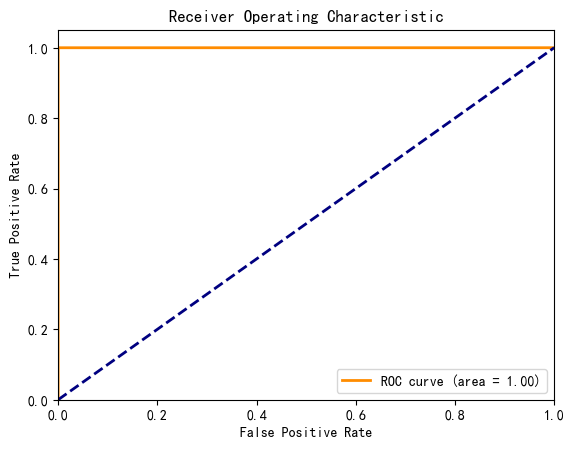

In [97]:
# 计算并输出 AUC
roc_auc = roc_auc_score(y_train, rf_clf.predict(X_train))
print("AUC: {:.2f}".format(roc_auc))

fpr, tpr, _ = roc_curve(y_train, rf_clf.predict(X_train))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# 创建随机森林分类器
rf_clf = RandomForestClassifier(random_state=42)

# 定义超参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

# 训练模型
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳模型进行预测
best_rf_clf = grid_search.best_estimator_

# 预测概率
y_test_proba = best_rf_clf.predict_proba(X_test)[:, 1]

# 预测类别
y_test_pred = best_rf_clf.predict(X_test)

# 输出预测的类别
print("Predicted labels:", y_test_pred)

# 输出预测的概率
print("Predicted probabilities:", y_test_proba)

# 计算并输出 AUC
roc_auc = roc_auc_score(y_test, y_test_proba)
print("AUC: {:.2f}".format(roc_auc))

# 绘制 ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

GBT

梯度提升树

In [60]:
from sklearn.ensemble import GradientBoostingClassifier


clf1 = GradientBoostingClassifier()
model = clf1.fit(X_train_split, y_train_split)
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf1.predict(X_train_split)
test_predict = clf1.predict(X_test_split)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train_split,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test_split,test_predict))


The accuracy of the Logistic Regression is: 0.8093312331126922
The accuracy of the Logistic Regression is: 0.8079831982348707


In [61]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [64]:
X_train_split.shape

(339012, 170)

In [73]:
model.predict_proba(X_test_split)

array([[0.91679046, 0.08320954],
       [0.5481874 , 0.4518126 ],
       [0.85351486, 0.14648514],
       ...,
       [0.89466342, 0.10533658],
       [0.82634348, 0.17365652],
       [0.89022906, 0.10977094]])

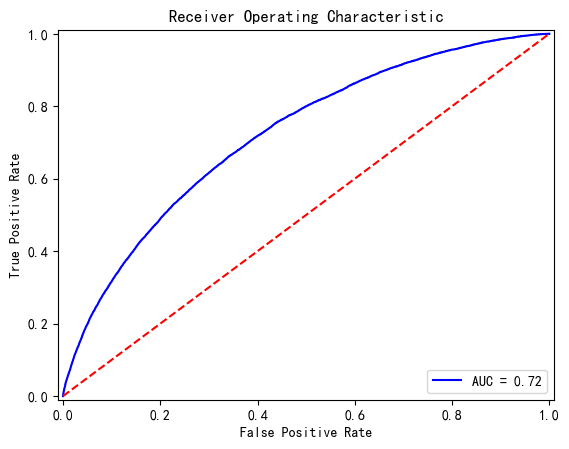

In [65]:
plot_roc_curve(y_test_split, model.predict_proba(X_test_split)[:, 1])

In [68]:
y_submit = model.predict_proba(X_need_pred)[:, 1]

提交

In [70]:
submit['isDefault'] = y_submit

In [72]:
submit.to_csv('out_gbt.csv', index=False)

In [70]:
log_clf = loadModel('log_clf.pkl')
xgboost_clf = loadModel('xgboost_clf.pkl')